### 查看网格和站点对应情况

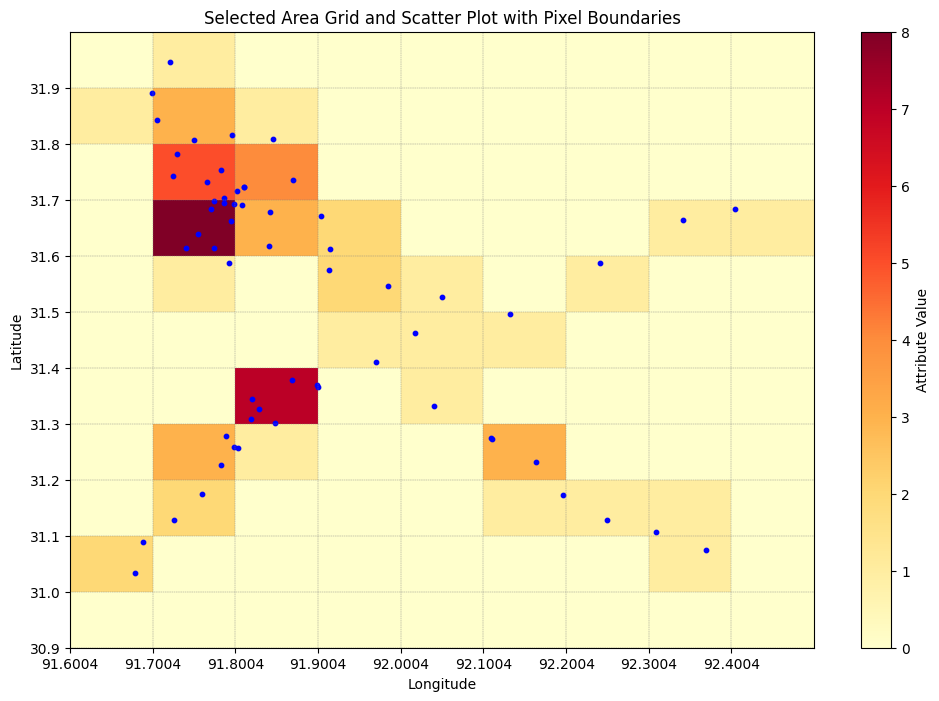

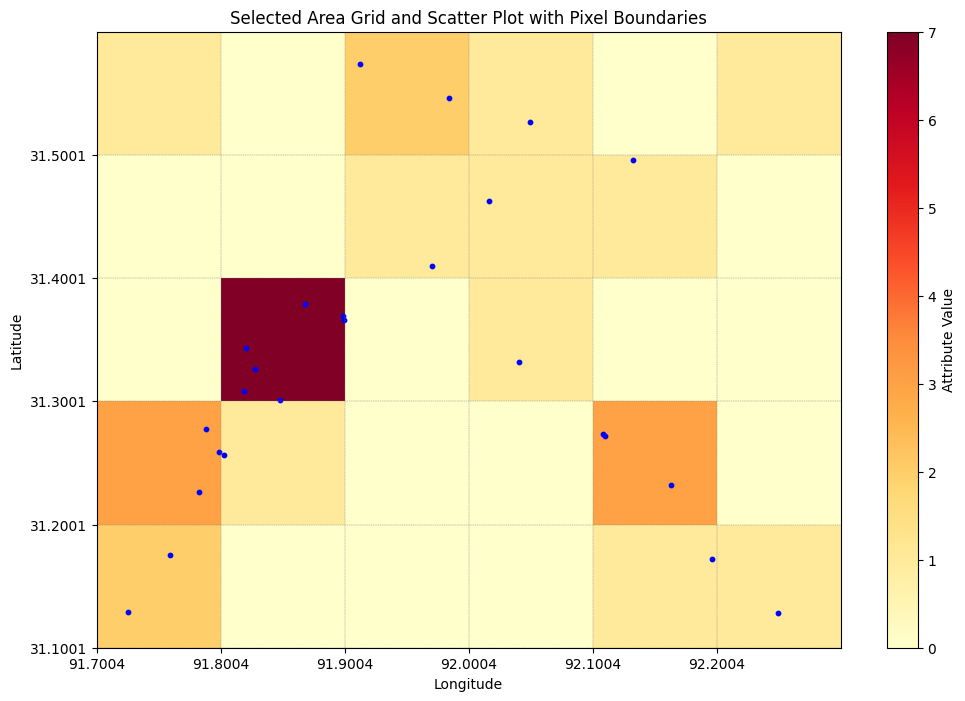

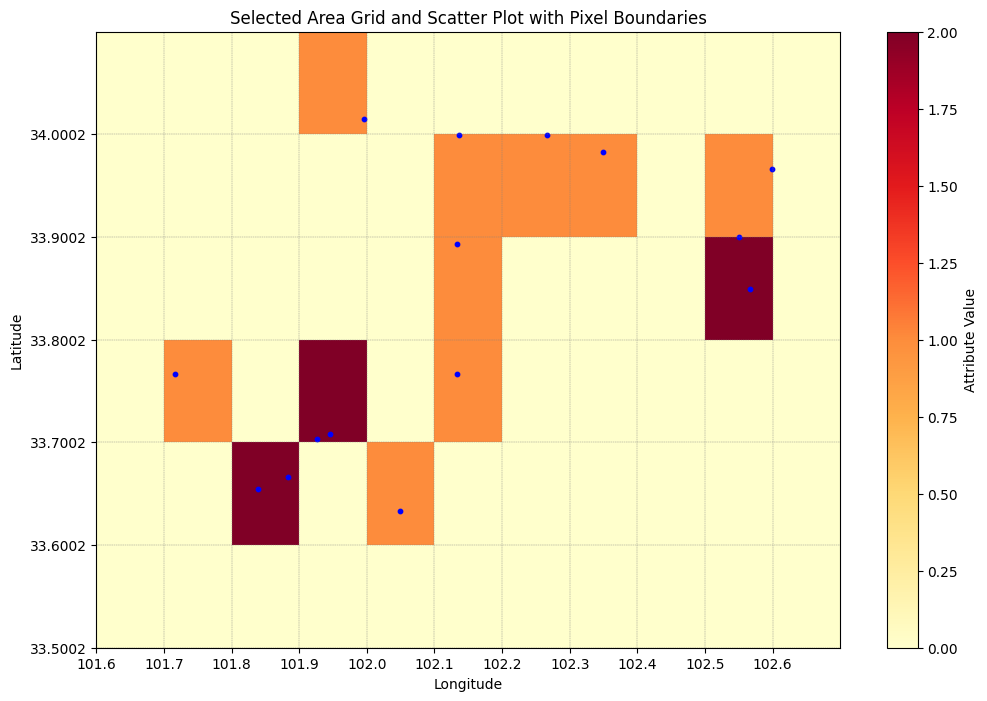

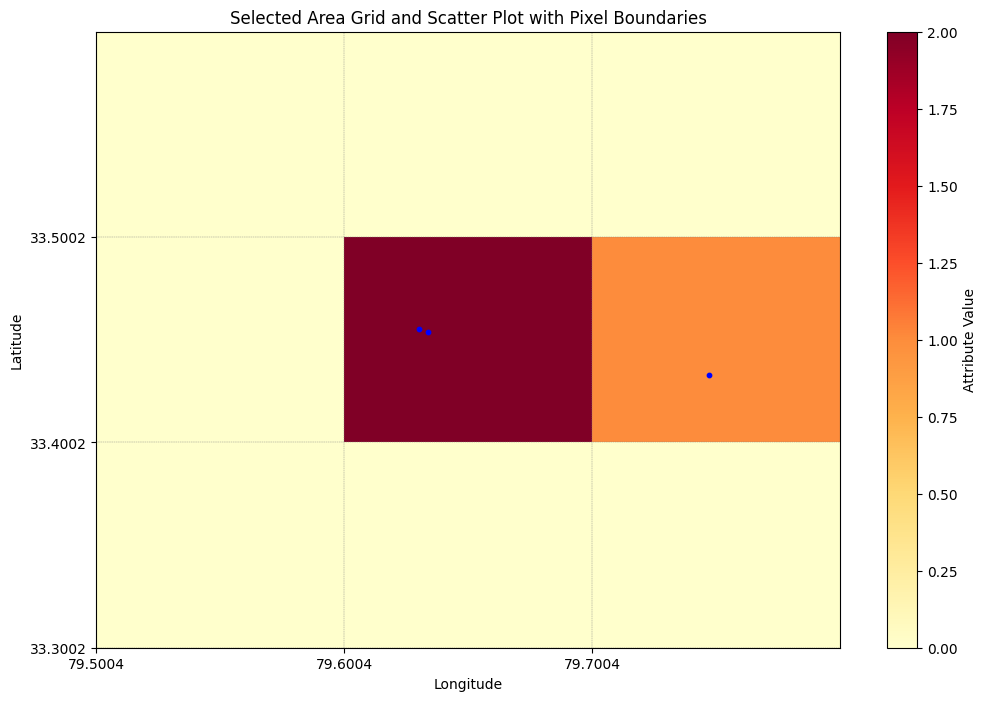

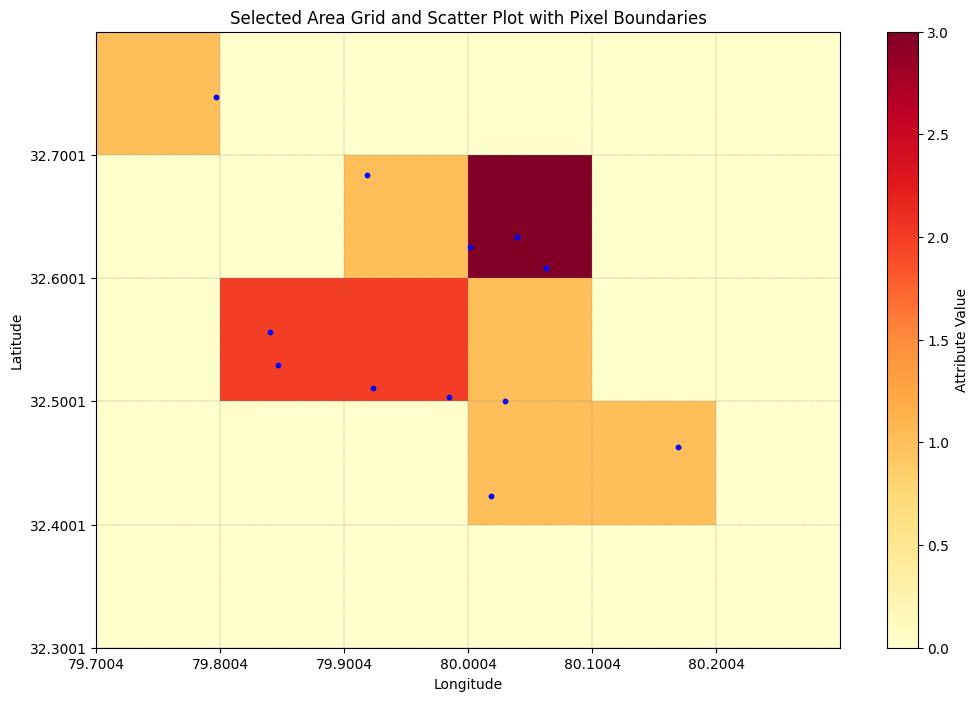

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lat_min = 25.550117
lat_max = 40.450184
lon_min = 66.95031
lon_max = 104.95048
lat_points = 150
lon_points = 381
lat_step = (lat_max - lat_min) / (lat_points - 1)
lon_step = (lon_max - lon_min) / (lon_points - 1)
lat = np.linspace(lat_min, lat_max, lat_points)
lon = np.linspace(lon_min, lon_max, lon_points)
lon_grid, lat_grid = np.meshgrid(lon, lat)

# 步骤 2：通过 lon 和 lat 长度建立对应属性矩阵
attribute_matrix = np.zeros_like(lon_grid)

# 读取 Excel 文件中的数据
file_path = r"D:\Data_Store\orgianl_data\ISMN\3H\clip_data\info.xls"
xl = pd.ExcelFile(file_path)
sheets = {sheet_name: xl.parse(sheet_name) for sheet_name in xl.sheet_names}

# 步骤 5 中将会使用的散点-网格查询函数
def find_grid_coordinates(lon, lat, lon_grid, lat_grid):
    dist = (lon_grid - lon)**2 + (lat_grid - lat)**2
    i, j = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
    return (lon_grid[i, j], lat_grid[i, j]), (i, j)

# 步骤 3：遍历每个子表填充属性矩阵
for sheet in sheets.values():
    for _, row in sheet.iterrows():
        lon, lat = row['longitude'], row['latitude']
        _, (i, j) = find_grid_coordinates(lon, lat, lon_grid, lat_grid)
        attribute_matrix[i, j] += 1

def draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_min, lat_max, lon_min, lon_max):
    lat_offset = abs(lat_grid[0,0]-lat_grid[1,0])/2
    lon_offset = abs(lon_grid[0,0]-lon_grid[0,1])/2
    # 确定所选区域内的网格点
    lat_inds = np.where((lat_grid[:,0] >= lat_min) & (lat_grid[:,0] <= lat_max))
    lon_inds = np.where((lon_grid[0,:] >= lon_min) & (lon_grid[0,:] <= lon_max))

    # 提取子区域的网格和属性矩阵
    selected_lon_grid = lon_grid[lat_inds[0][0]:lat_inds[0][-1]+1, lon_inds[0][0]:lon_inds[0][-1]+1]
    selected_lat_grid = lat_grid[lat_inds[0][0]:lat_inds[0][-1]+1, lon_inds[0][0]:lon_inds[0][-1]+1]
    selected_attribute_matrix = attribute_matrix[lat_inds[0][0]:lat_inds[0][-1]+1, lon_inds[0][0]:lon_inds[0][-1]+1]

    # 绘制网格
    plt.figure(figsize=(12, 8))
    plt.pcolormesh(selected_lon_grid, selected_lat_grid, selected_attribute_matrix, shading='auto', cmap='YlOrRd')
    plt.colorbar(label='Attribute Value')

    # 绘制虚线网格
    plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.3)
    plt.xticks(selected_lon_grid[0, :]-lon_offset)
    plt.yticks(selected_lat_grid[:, 0]-lat_offset)

    # 绘制散点
    for sheet in sheets.values():
        within_lon = (sheet['longitude'] >= lon_min) & (sheet['longitude'] <= lon_max)
        within_lat = (sheet['latitude'] >= lat_min) & (sheet['latitude'] <= lat_max)
        selected_sheet = sheet[within_lon & within_lat]
        plt.scatter(selected_sheet['longitude'], selected_sheet['latitude'], color='blue', s=10)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Selected Area Grid and Scatter Plot with Pixel Boundaries')
    plt.show()

# 使用函数绘制给定区域
lon_min = 91.679-0.1
lon_max = 92.405+0.1
lat_min = 31.033-0.1
lat_max = 31.946+0.1

draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_min, lat_max, lon_min, lon_max)

# 使用函数绘制给定区域
lon_minnaqu = 91.7833-0.1
lon_maxnaqu = 92.11031+0.2
lat_minnaqu = 31.22623-0.1
lat_maxnaqu = 31.37878+0.2
draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_minnaqu, lat_maxnaqu, lon_minnaqu, lon_maxnaqu)

# 使用函数绘制给定区域
lon_minmaqu = 101.7166-0.1
lon_maxmaqu = 102.5666+0.1
lat_minmaqu = 33.6333-0.1
lat_maxmaqu = 34.01525+0.1

draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_minmaqu, lat_maxmaqu, lon_minmaqu, lon_maxmaqu)

# 使用函数绘制给定区域
lon_minali = 79.63061-0.1
lon_maxali = 79.74763+0.1
lat_minali = 33.43287-0.1
lat_maxali = 33.45517+0.1

draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_minali, lat_maxali, lon_minali, lon_maxali)

# 使用函数绘制给定区域
lon_minShiquanhe = 79.79694-0.1
lon_maxShiquanhe = 80.16914+0.1
lat_minShiquanhe = 32.42302-0.1
lat_maxShiquanhe = 32.74722+0.1

draw_selected_area(lon_grid, lat_grid, attribute_matrix, sheets, lat_minShiquanhe, lat_maxShiquanhe, lon_minShiquanhe, lon_maxShiquanhe)


# 损失权重矩阵

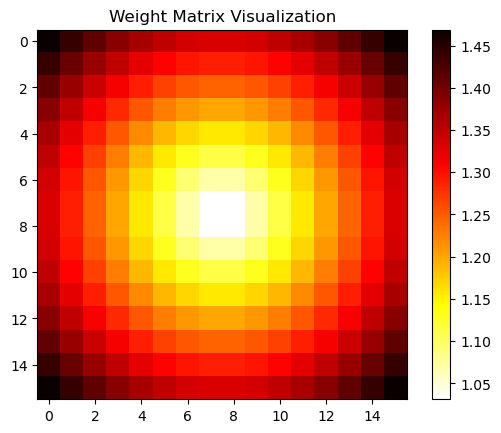

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def create_weight_matrix(patch_size, ratio):
    N, M = patch_size
    center = (N - 1) / 2.0, (M - 1) / 2.0
    Y, X = np.ogrid[:N, :M]
    distance = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
    max_distance = np.sqrt((N/2)**2 + (M/2)**2)
    weights = 1 + (ratio - 1) * (distance / max_distance)
    return weights

patch_size = (16, 16)
ratio = 1.5

weight_matrix = create_weight_matrix(patch_size, ratio)
weight_matrix

plt.imshow(weight_matrix, cmap='hot_r', interpolation='nearest')
plt.colorbar()
plt.title("Weight Matrix Visualization")
plt.show()